In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/Users/bpb/Downloads/20160801_C18_ACN___FPS_Msonly_KBL_MO_Qex_UV_QCMix_Pre____1001_A_135to2000__Run3.csv')

# Grab the retention time

In [3]:
rt = df['Unnamed: 0'].tolist()

# Remove empty columns

In [4]:
df.drop([k for k in df.keys() if k.startswith('Unnamed')], axis=1, inplace=True)


# Grab the wavelength

In [5]:
wavelength = df.keys()

# Store absorbance values in a 2d matrix

In [6]:
values = df.as_matrix()

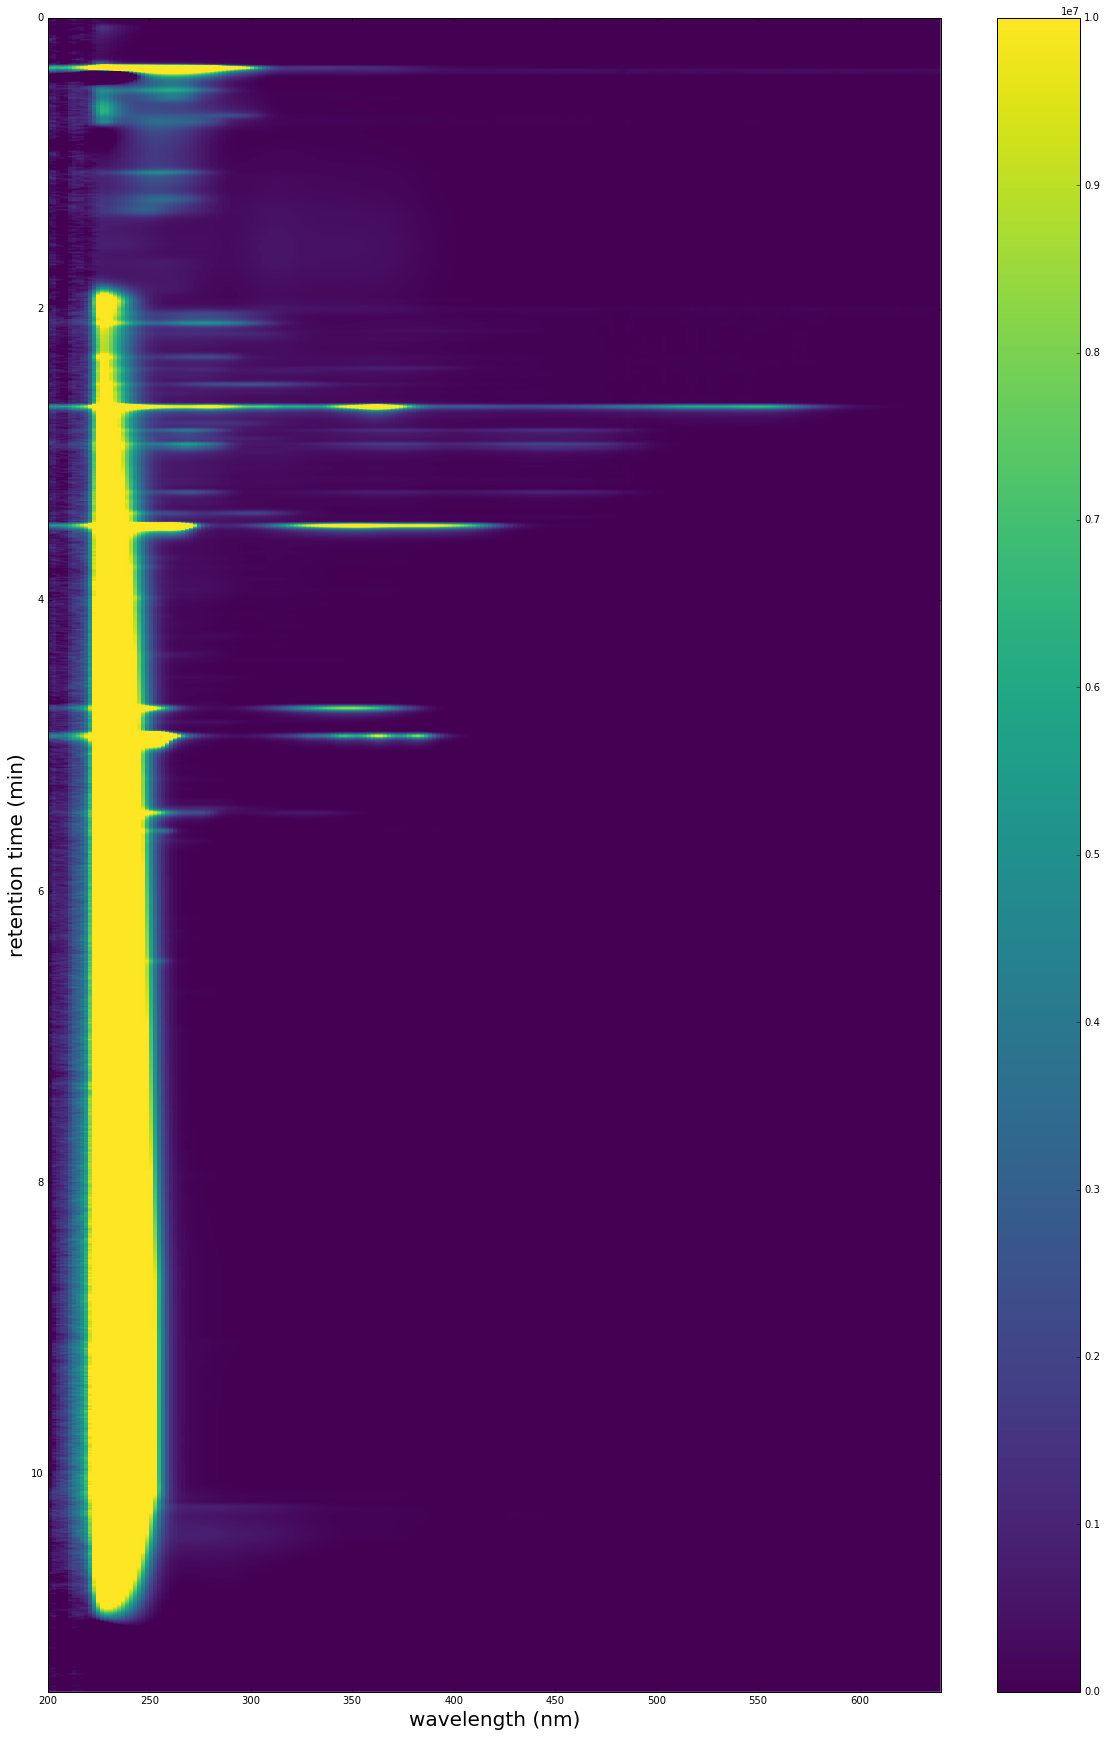

In [7]:
fig = plt.figure(figsize = (20,30))
plt.imshow((values+1.0),interpolation='none',extent=[float(wavelength[0]),float(wavelength[-1]),
                                                     float(rt[-1]),float(rt[0])],
           aspect='auto',
          vmin=0, vmax=1e7,cmap = 'viridis')

plt.ylabel('retention time (min)',fontsize=20)
plt.xlabel('wavelength (nm)',fontsize=20)
plt.colorbar()
plt.show()
fig.savefig('light absorbance.png')